# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
#2.1 - Crie 2 faixas de Latitude do municipio 'munResLat'
sinasc_2 = sinasc_raw[['munResLat', 'QTDPARTNOR', 'QTDPARTCES']].copy()
sinasc_2.dropna(inplace=True)


def dicionario_latitude(series):
  latitude = []
  dicionario = {}
  for dado in series:
    if dado not in latitude:
      latitude.append(dado)
  for dado in latitude:
    if dado > -10.5:
      dicionario[str(dado)] = 'Acima de -10.5'
    else:
      dicionario[str(dado)] = 'Abaixo de -10.5'
  return dicionario

mapping = dicionario_latitude(sinasc_2.munResLat)
sinasc_2.munResLat = sinasc_2.munResLat.astype('str')

sinasc_2 = sinasc_2.set_index('munResLat')

sinasc_2 = sinasc_2.groupby(mapping).agg([('soma', 'sum'), ('media', 'mean'), ('minimo', 'min'), ('maximo', 'max'),
                                          ('mediana', 'median'), ('desvio padrao', 'std'), ('variancia', 'var')])
sinasc_2

QTDPARTNOR                                                \
                      soma     media minimo maximo mediana desvio padrao   
munResLat                                                                  
Abaixo de -10.5     5694.0  0.444983    0.0   40.0     0.0      1.054967   
Acima de -10.5      8201.0  0.681486    0.0   30.0     0.0      1.216187   

                          QTDPARTCES                                  \
                variancia       soma     media minimo maximo mediana   
munResLat                                                              
Abaixo de -10.5  1.112956     7043.0  0.550406    0.0   12.0     0.0   
Acima de -10.5   1.479110     5552.0  0.461359    0.0   12.0     0.0   

                                         
                desvio padrao variancia  
munResLat                                
Abaixo de -10.5      0.752980  0.566978  
Acima de -10.5       0.726127  0.527261

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_3 = sinasc_raw[['munResArea', 'QTDPARTNOR', 'QTDPARTCES']].copy()
sinasc_3.dropna(inplace=True)

def dicionario_area(series):
  area = []
  dicionario = {}
  for dado in series:
    if dado not in area:
      area.append(dado)
  for dado in area:
    if dado > 3000:
      dicionario[str(dado)] = 'Acima de 3000'
    else:
      dicionario[str(dado)] = 'Abaixo de 3000'
  return dicionario

mapping = dicionario_area(sinasc_3.munResArea)
sinasc_3.munResArea = sinasc_3.munResArea.astype('str')

sinasc_3 = sinasc_3.set_index('munResArea')

sinasc_3 = sinasc_3.groupby(mapping).agg([('soma', 'sum'), ('media', 'mean'), ('minimo', 'min'), ('maximo', 'max'),
                                          ('mediana', 'median'), ('desvio padrao', 'std'), ('variancia', 'var')])
sinasc_3

QTDPARTNOR                                                \
                     soma     media minimo maximo mediana desvio padrao   
munResArea                                                                
Abaixo de 3000     1899.0  0.369527    0.0   10.0     0.0      0.855599   
Acima de 3000     11996.0  0.609212    0.0   40.0     0.0      1.200768   

                         QTDPARTCES                                  \
               variancia       soma     media minimo maximo mediana   
munResArea                                                            
Abaixo de 3000  0.732049     2939.0  0.571901    0.0    5.0     0.0   
Acima de 3000   1.441843     9656.0  0.490376    0.0   12.0     0.0   

                                        
               desvio padrao variancia  
munResArea                              
Abaixo de 3000      0.749748  0.562122  
Acima de 3000       0.738306  0.545095

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_4 = sinasc_raw[['munResAlt', 'QTDPARTNOR', 'QTDPARTCES']].copy()
sinasc_4.dropna(inplace=True)

np.sort(sinasc_4.munResAlt.unique())
def dicionario_alt(series):
  alt = []
  dicionario = {}
  for dado in series:
    if dado not in alt:
      alt.append(dado)
  for dado in alt:
    if dado >= 0 and dado < 150:
      dicionario[str(dado)] = 'de 0 a 150'
    elif dado >= 150 and dado < 200:
      dicionario[str(dado)] = 'de 150 a 200'
    elif dado >= 200 and dado < 300:
      dicionario[str(dado)] = 'de 200 a 300'
    else:
      dicionario[str(dado)] = 'maior que 300'
  return dicionario

mapping = dicionario_alt(sinasc_4.munResAlt)
sinasc_4.munResAlt = sinasc_4.munResAlt.astype('str')

sinasc_4 = sinasc_4.set_index('munResAlt')

sinasc_4 = sinasc_4.groupby(mapping).agg([('soma', 'sum'), ('media', 'mean'), ('minimo', 'min'), ('maximo', 'max'),
                                          ('mediana', 'median'), ('desvio padrao', 'std'), ('variancia', 'var')])
sinasc_4

QTDPARTNOR                                                \
                    soma     media minimo maximo mediana desvio padrao   
munResAlt                                                                
de 0 a 150        8281.0  0.746911    0.0   30.0     0.0      1.296752   
de 150 a 200      3435.0  0.447790    0.0    9.0     0.0      0.953060   
de 200 a 300      1313.0  0.364317    0.0   40.0     0.0      1.076153   
maior que 300      866.0  0.350891    0.0    9.0     0.0      0.871596   

                        QTDPARTCES                                  \
              variancia       soma     media minimo maximo mediana   
munResAlt                                                            
de 0 a 150     1.681565     4937.0  0.445296    0.0   12.0     0.0   
de 150 a 200   0.908323     3966.0  0.517012    0.0   12.0     0.0   
de 200 a 300   1.158105     2284.0  0.633740    0.0    5.0     0.0   
maior que 300  0.759679     1408.0  0.570502    0.0    4.0     0.0   

                                       
              desvio padrao variancia  
munResAlt                              
de 0 a 150         0.724720  0.525218  
de 150 a 200       0.747314  0.558478  
de 200 a 300       0.751820  0.565234  
maior que 300      0.751901  0.565356

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [8]:
sinasc_5 = sinasc_raw[['DTNASC', 'IDADEMAE', 'munResNome']].copy()
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_5 = sinasc_5.set_index('munResNome')

sinasc_5.groupby(['DTNASC', imediatas]).mean().unstack()

IDADEMAE                                                        
munResNome  Ariquemes     Cacoal       Jaru  Ji-Paraná Porto Velho    Vilhena
DTNASC                                                                       
2019-01-01  23.200000  23.250000  31.000000  24.142857   21.388889  27.750000
2019-01-02  26.166667  27.666667  30.800000  25.545455   26.050000  28.727273
2019-01-03  24.142857  27.846154  26.000000  27.000000   26.638889  23.375000
2019-01-04  24.666667  25.230769  22.500000  23.125000   28.814815  26.000000
2019-01-05  22.888889  23.200000  23.250000  27.100000   27.250000  28.200000
...               ...        ...        ...        ...         ...        ...
2019-12-27  24.666667  24.000000  25.333333  27.466667   28.410256  27.000000
2019-12-28  23.833333  22.888889  23.333333  26.375000   26.291667  22.666667
2019-12-29  23.166667  24.100000  24.666667  24.125000   25.470588  24.250000
2019-12-30  23.666667  28.437500  28.857143  28.750000   27.777778  26.600000
2019-12-31  24.666667  23.400000  23.333333  26.200000   26.000000  23.857143

[365 rows x 6 columns]

In [44]:
import warnings
warnings.filterwarnings('ignore')
# sinasc_5.DTNASC = pd.to_datetime(sinasc_5['DTNASC'])
sinasc_5['MONTH'] = pd.DatetimeIndex(sinasc_5['DTNASC']).month
sinasc_5.groupby(['MONTH', imediatas]).mean().unstack()

IDADEMAE                                                        
munResNome  Ariquemes     Cacoal       Jaru  Ji-Paraná Porto Velho    Vilhena
MONTH                                                                        
1           24.866412  26.350543  26.086667  25.792056   26.017668  26.665049
2           25.316239  25.969444  25.586777  26.417949   26.215000  26.781818
3           25.288660  26.319410  26.215686  25.490364   26.347207  26.386667
4           25.411972  26.235149  25.291667  26.075862   26.172336  26.686099
5           25.410256  26.031008  25.187050  25.931264   25.830470  25.586207
6           26.652510  25.845333  26.055944  26.272727   26.421628  26.526627
7           24.973783  26.780488  24.611111  25.809399   26.139903  26.373057
8           25.684615  26.539106  25.864865  25.938144   26.070588  26.297436
9           25.561644  26.779126  25.748299  25.640177   25.966435  26.407407
10          25.736111  26.335878  26.453125  26.246341   25.886473  26.161435
11          25.765432  26.770053  25.242424  27.313316   26.394737  26.169725
12          24.821577  26.207071  25.967105  26.482289   26.575567  27.010753

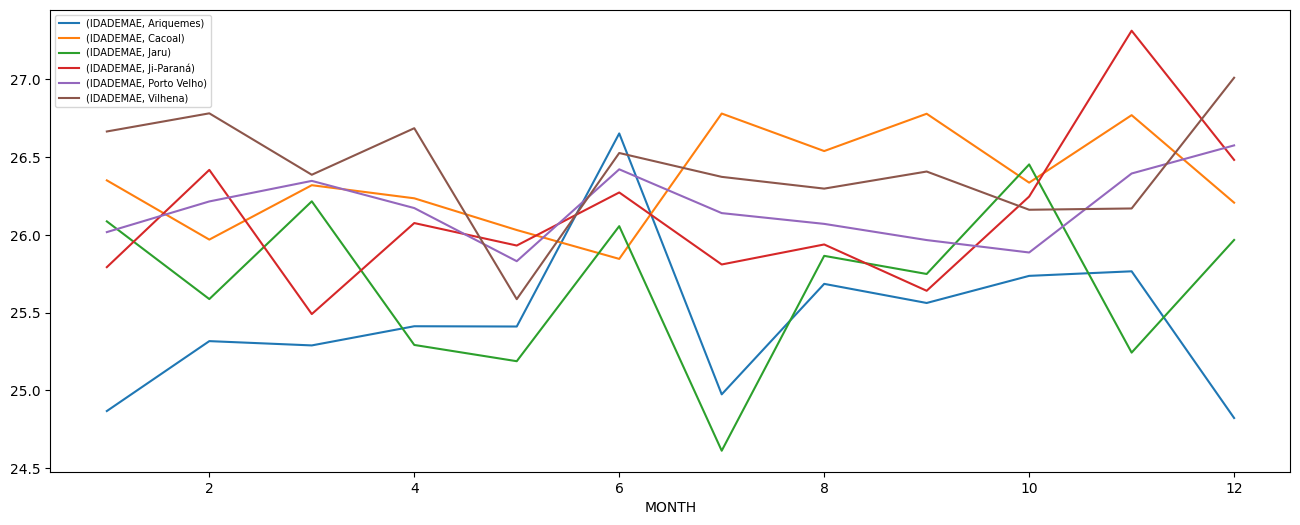

In [45]:
#Plotando
sinasc_5.groupby(['MONTH', imediatas]).mean().unstack().plot(figsize=(16,6)).legend(loc='best', prop={'size': 7});

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [34]:
mapping = {
    "Candeias do Jamari": "IDH Médio",
    "Guajará-Mirim": "IDH Médio",
    "Itapuã do Oeste": "IDH Médio",
    "Nova Mamoré": "IDH Baixo",
    "Porto Velho": "IDH Alto",
    "Ariquemes": "IDH Alto",
    "Alto Paraíso": "IDH Médio",
    "Buritis": "IDH Médio",
    "Cacaulândia": "IDH Médio",
    "Campo Novo de Rondônia": "IDH Baixo",
    "Cujubim": "IDH Médio",
    "Monte Negro": "IDH Médio",
    "Rio Crespo": "IDH Médio",
    "Jaru": "IDH Médio",
    "Governador Jorge Teixeira": "IDH Baixo",
    "Machadinho D'Oeste": "IDH Baixo",
    "Theobroma": "IDH Baixo",
    "Vale do Anari": "IDH Baixo",
    "Alvorada D'Oeste": "IDH Médio",
    "Costa Marques": "IDH Médio",
    "Ji-Paraná": "IDH Alto",
    "Mirante da Serra": "IDH Médio",
    "Nova União": "IDH Baixo",
    "Ouro Preto do Oeste": "IDH Médio",
    "Presidente Médici": "IDH Médio",
    "São Francisco do Guaporé": "IDH Médio",
    "São Miguel do Guaporé": "IDH Médio",
    "Seringueiras": "IDH Baixo",
    "Teixeirópolis": "IDH Médio",
    "Urupá": "IDH Médio",
    "Vale do Paraíso": "IDH Médio",
    "Cacoal": "IDH Alto",
    "Alta Floresta D'Oeste": "IDH Médio",
    "Alto Alegre dos Parecis": "IDH Baixo",
    "Castanheiras": "IDH Médio",
    "Espigão D'Oeste": "IDH Médio",
    "Ministro Andreazza": "IDH Médio",
    "Nova Brasilândia D'Oeste": "IDH Médio",
    "Novo Horizonte do Oeste": "IDH Médio",
    "Parecis": "IDH Médio",
    "Pimenta Bueno": "IDH Alto",
    "Primavera de Rondônia": "IDH Médio",
    "Rolim de Moura": "IDH Alto",
    "Santa Luzia D'Oeste": "IDH Médio",
    "São Felipe D'Oeste": "IDH Médio",
    "Vilhena": "IDH Alto",
    "Cabixi": "IDH Médio",
    "Cerejeiras": "IDH Médio",
    "Chupinguaia": "IDH Médio",
    "Colorado do Oeste": "IDH Médio",
    "Corumbiara": "IDH Médio",
    "Pimenteiras do Oeste": "IDH Médio"
}

sinasc_6 = sinasc_raw[['munResNome', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEMAE']].copy()
sinasc_6.set_index('munResNome', inplace=True)
sinasc_6.groupby(mapping).mean()

,QTDPARTNOR,QTDPARTCES,IDADEMAE
munResNome,,,
IDH Alto,0.578495,0.499454,26.280332
IDH Baixo,0.662162,0.488979,25.326944
IDH Médio,0.563303,0.568660,25.884855


<Axes: xlabel='munResNome'>

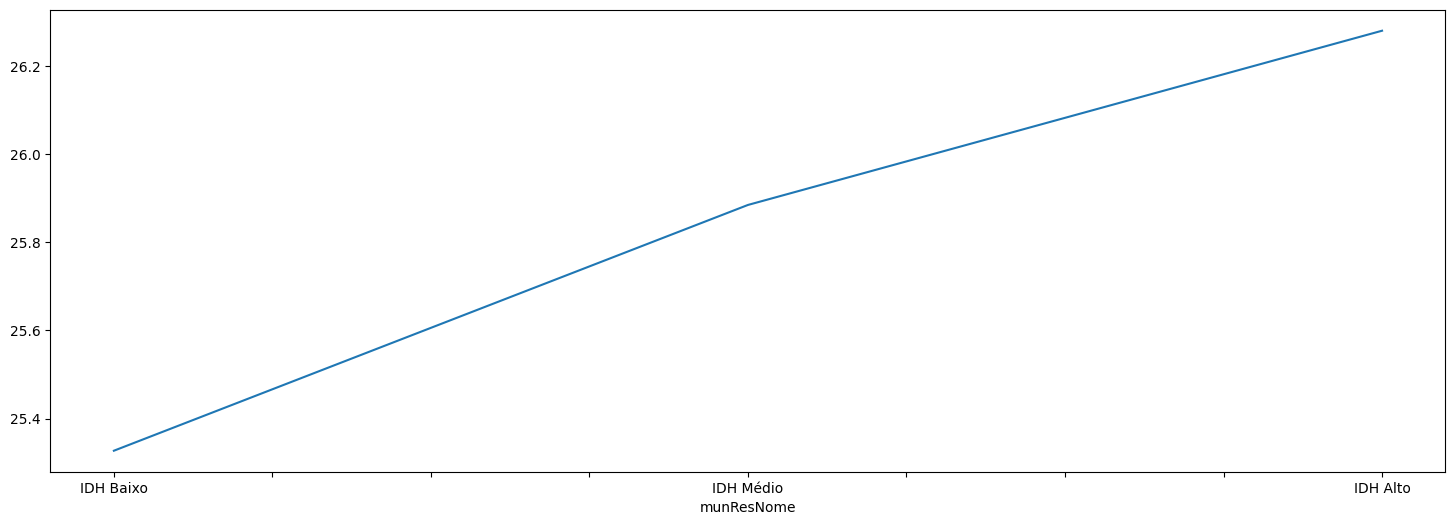

In [42]:
# Podemos ver que quanto maior o IDH da região, maior a média das idades das mães.
sinasc_6.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize=(18,6))

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [46]:
mapping = {
    "Candeias do Jamari": "",
    "Guajará-Mirim": "",
    "Itapuã do Oeste": "",
    "Nova Mamoré": "",
    "Porto Velho": "",
    "Ariquemes": "",
    "Alto Paraíso": "",
    "Buritis": "",
    "Cacaulândia": "",
    "Campo Novo de Rondônia": "",
    "Cujubim": "",
    "Monte Negro": "",
    "Rio Crespo": "",
    "Jaru": "",
    "Governador Jorge Teixeira": "",
    "Machadinho D'Oeste": "",
    "Theobroma": "",
    "Vale do Anari": "",
    "Alvorada D'Oeste": "",
    "Costa Marques": "",
    "Ji-Paraná": "",
    "Mirante da Serra": "",
    "Nova União": "",
    "Ouro Preto do Oeste": "",
    "Presidente Médici": "",
    "São Francisco do Guaporé": "",
    "São Miguel do Guaporé": "",
    "Seringueiras": "",
    "Teixeirópolis": "",
    "Urupá": "",
    "Vale do Paraíso": "",
    "Cacoal": "",
    "Alta Floresta D'Oeste": "",
    "Alto Alegre dos Parecis": "",
    "Castanheiras": "",
    "Espigão D'Oeste": "",
    "Ministro Andreazza": "",
    "Nova Brasilândia D'Oeste": "",
    "Novo Horizonte do Oeste": "",
    "Parecis": "",
    "Pimenta Bueno": "",
    "Primavera de Rondônia": "",
    "Rolim de Moura": "",
    "Santa Luzia D'Oeste": "",
    "São Felipe D'Oeste": "",
    "Vilhena": "",
    "Cabixi": "",
    "Cerejeiras": "",
    "Chupinguaia": "",
    "Colorado do Oeste": "",
    "Corumbiara": "",
    "Pimenteiras do Oeste": ""
}
map_organizado = list(mapping)
map_organizado.sort()

mapping = {
 "Alta Floresta D'Oeste" : 'Desenvolvimento Moderado',
 'Alto Alegre dos Parecis' : 'Desenvolvimento Regular',
 'Alto Paraíso' : 'Desenvolvimento Regular',
 "Alvorada D'Oeste" : 'Desenvolvimento Regular',
 'Ariquemes' : 'Desenvolvimento Moderado',
 'Buritis' : 'Desenvolvimento Moderado',
 'Cabixi' : 'Desenvolvimento Regular',
 'Cacaulândia' : 'Desenvolvimento Regular',
 'Cacoal' : 'Desenvolvimento Moderado',
 'Campo Novo de Rondônia' : 'Desenvolvimento Regular',
 'Candeias do Jamari' : 'Desenvolvimento Moderado',
 'Castanheiras' : 'Desenvolvimento Regular',
 'Cerejeiras' : 'Desenvolvimento Moderado',
 'Chupinguaia' : 'Desenvolvimento Moderado',
 'Colorado do Oeste' : 'Desenvolvimento Moderado',
 'Corumbiara' : 'Desenvolvimento Regular',
 'Costa Marques' : 'Desenvolvimento Regular',
 'Cujubim' : 'Desenvolvimento Regular',
 "Espigão D'Oeste" : 'Desenvolvimento Regular',
 'Governador Jorge Teixeira' : 'Desenvolvimento Regular',
 'Guajará-Mirim' : 'Desenvolvimento Regular',
 'Itapuã do Oeste' : 'Desenvolvimento Regular',
 'Jaru' : 'Desenvolvimento Moderado',
 'Ji-Paraná' : 'Desenvolvimento Moderado',
 "Machadinho D'Oeste" : 'Desenvolvimento Regular',
 'Ministro Andreazza' : 'Desenvolvimento Regular',
 'Mirante da Serra' : 'Desenvolvimento Regular',
 'Monte Negro' : 'Desenvolvimento Moderado',
 "Nova Brasilândia D'Oeste" : 'Desenvolvimento Regular',
 'Nova Mamoré' : 'Desenvolvimento Regular',
 'Nova União' : 'Desenvolvimento Regular',
 'Novo Horizonte do Oeste' : 'Desenvolvimento Regular',
 'Ouro Preto do Oeste' : 'Desenvolvimento Moderado',
 'Parecis' : 'Desenvolvimento Regular',
 'Pimenta Bueno' : 'Desenvolvimento Moderado',
 'Pimenteiras do Oeste' : 'Desenvolvimento Moderado',
 'Porto Velho' : 'Desenvolvimento Moderado',
 'Presidente Médici' : 'Desenvolvimento Moderado',
 'Primavera de Rondônia' : 'Desenvolvimento Moderado',
 'Rio Crespo' : 'Desenvolvimento Moderado',
 'Rolim de Moura' : 'Desenvolvimento Moderado',
 "Santa Luzia D'Oeste" : 'Desenvolvimento Moderado',
 'Seringueiras' : 'Desenvolvimento Regular',
 "São Felipe D'Oeste" : 'Desenvolvimento Moderado',
 'São Francisco do Guaporé' : 'Desenvolvimento Moderado',
 'São Miguel do Guaporé' : 'Desenvolvimento Moderado',
 'Teixeirópolis' : 'Desenvolvimento Moderado',
 'Theobroma' : 'Desenvolvimento Regular',
 'Urupá' : 'Desenvolvimento Moderado',
 'Vale do Anari' : 'Desenvolvimento Regular',
 'Vale do Paraíso' : 'Desenvolvimento Regular',
 'Vilhena' : 'Desenvolvimento Moderado'
}

sinasc_7 = sinasc_raw[['munResNome', 'IDADEMAE', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO']].copy()
sinasc_7.set_index('munResNome', inplace=True)
sinasc_7.groupby(mapping).mean()

,IDADEMAE,QTDFILMORT,APGAR1,APGAR5,PESO
munResNome,,,,,
Desenvolvimento Moderado,26.223139,0.270330,8.165463,9.185394,3243.420532
Desenvolvimento Regular,25.535131,0.250616,8.016209,9.152066,3242.203306


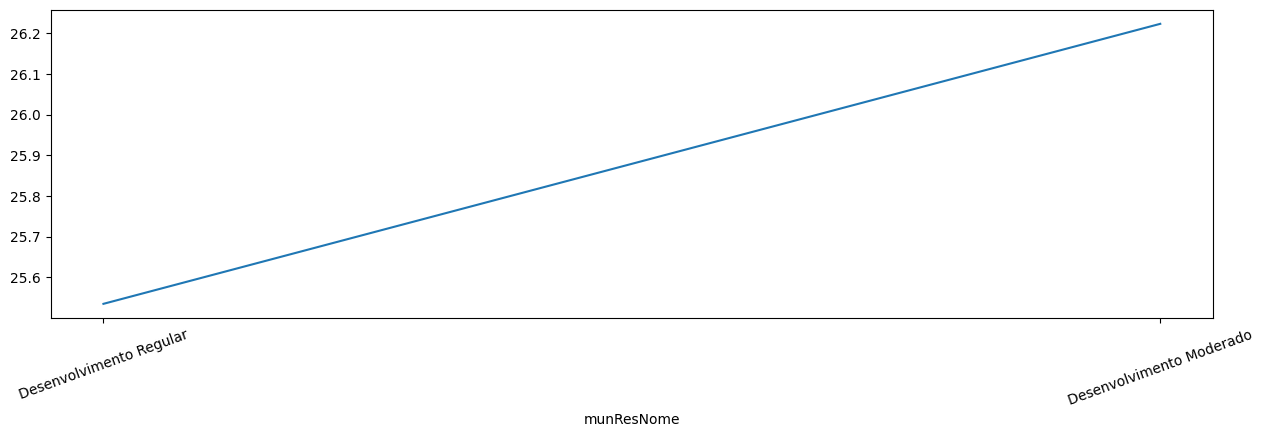

In [71]:
sinasc_7.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize=(15,4));
plt.xticks([0,1], ['Desenvolvimento Regular', 'Desenvolvimento Moderado'], rotation=20);
# PODEMOS VER NESSE GRÁFICO QUE QUANTO MAIOR O IFDM DO MUNICIPIO MAIOR A IDADE MEDIA DAS MAES
# ISSO TAMBEM SE REPETE QUANTO AOS DEMAIS ATRIBUTOS, APGAR1, APGAR5.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [152]:
mapping = {
 "Alta Floresta D'Oeste" : 'Acima de 300 Milhões',
 'Alto Alegre dos Parecis' : 'Acima de 200 Milhões',
 'Alto Paraíso' : 'Acima de 300 Milhões',
 "Alvorada D'Oeste" : 'Acima de 200 Milhões',
 'Ariquemes' : 'Acima de 1 Bilhão',
 'Buritis' : 'Acima de 500 Milhões',
 'Cabixi' : 'Acima de 100 Milhões',
 'Cacaulândia' : 'Acima de 100 Milhões',
 'Cacoal' : 'Acima de 1 Bilhão',
 'Campo Novo de Rondônia' : 'Acima de 200 Milhões',
 'Candeias do Jamari' : 'Acima de 500 Milhões',
 'Castanheiras' : 'Até 100 Milhões',
 'Cerejeiras' : 'Acima de 500 Milhões',
 'Chupinguaia' : 'Acima de 100 Milhões',
 'Colorado do Oeste' : 'Acima de 300 Milhões',
 'Corumbiara' : 'Acima de 100 Milhões',
 'Costa Marques' : 'Acima de 100 Milhões',
 'Cujubim' : 'Acima de 300 Milhões',
 "Espigão D'Oeste" : 'Acima de 500 Milhões',
 'Governador Jorge Teixeira' : 'Acima de 100 Milhões',
 'Guajará-Mirim' : 'Acima de 300 Milhões',
 'Itapuã do Oeste' : 'Acima de 100 Milhões',
 'Jaru' : 'Acima de 1 Bilhão',
 'Ji-Paraná' : 'Acima de 1 Bilhão',
 "Machadinho D'Oeste" : 'Acima de 500 Milhões',
 'Ministro Andreazza' : 'Acima de 100 Milhões',
 'Mirante da Serra' : 'Acima de 100 Milhões',
 'Monte Negro' : 'Acima de 200 Milhões',
 "Nova Brasilândia D'Oeste" : 'Acima de 300 Milhões',
 'Nova Mamoré' : 'Acima de 500 Milhões',
 'Nova União' : 'Até 100 Milhões',
 'Novo Horizonte do Oeste' : 'Acima de 100 Milhões',
 'Ouro Preto do Oeste' : 'Acima de 500 Milhões',
 'Parecis' : 'Até 100 Milhões',
 'Pimenta Bueno' : 'Acima de 1 Bilhão',
 'Pimenteiras do Oeste' : 'Até 100 Milhões',
 'Porto Velho' : 'Acima de 1 Bilhão',
 'Presidente Médici' : 'Acima de 300 Milhões',
 'Primavera de Rondônia' : 'Até 100 Milhões',
 'Rio Crespo' : 'Até 100 Milhões',
 'Rolim de Moura' : 'Acima de 1 Bilhão',
 "Santa Luzia D'Oeste" : 'Acima de 100 Milhões',
 'Seringueiras' : 'Acima de 100 Milhões',
 "São Felipe D'Oeste" : 'Até 100 Milhões',
 'São Francisco do Guaporé' : 'Acima de 300 Milhões',
 'São Miguel do Guaporé' : 'Acima de 500 Milhões',
 'Teixeirópolis' : 'Até 100 Milhões',
 'Theobroma' : 'Acima de 100 Milhões',
 'Urupá' : 'Acima de 100 Milhões',
 'Vale do Anari' : 'Acima de 100 Milhões',
 'Vale do Paraíso' : 'Acima de 100 Milhões',
 'Vilhena' : 'Acima de 1 Bilhão'
}

sinasc_8 = sinasc_raw[['munResNome', 'IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CONSULTAS', 'APGAR1', 'APGAR5', 'PESO','PARTO']].copy()
sinasc_8.set_index('munResNome', inplace=True)
sinasc_8.groupby(mapping).mean()

<ipython-input-152-3f17b3c25f50>:58: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinasc_8.groupby(mapping).mean()


,IDADEMAE,QTDFILVIVO,QTDFILMORT,CONSULTAS,APGAR1,APGAR5,PESO
munResNome,,,,,,,
Acima de 1 Bilhão,26.265562,1.026435,0.270229,3.541103,8.167346,9.166223,3247.215719
Acima de 100 Milhões,25.662910,1.001561,0.237474,3.748975,8.045782,9.168210,3248.526639
Acima de 200 Milhões,25.323204,1.000000,0.238829,3.671271,8.110497,9.265193,3231.439227
Acima de 300 Milhões,25.724540,1.156714,0.257448,3.540398,8.031368,9.136484,3245.564074
Acima de 500 Milhões,25.853534,1.160582,0.292949,3.649446,8.143590,9.270471,3227.565143
Até 100 Milhões,26.515081,1.000000,0.162736,3.719258,7.969838,9.132251,3186.264501


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

<Axes: xlabel='munResNome'>

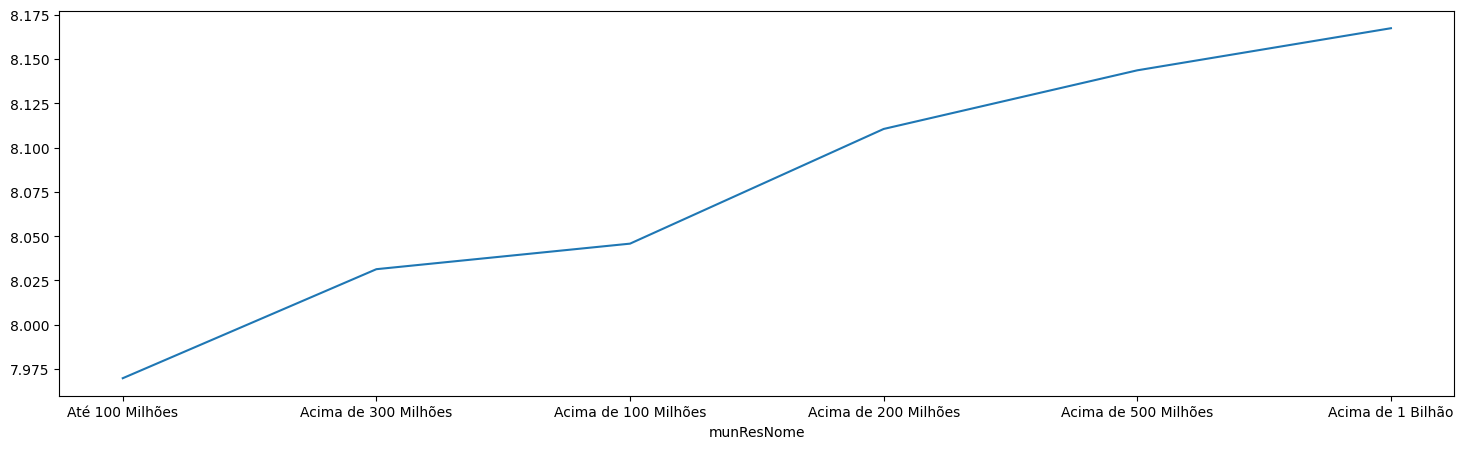

In [158]:
# QUANTO AO PIB, PODEMOS PERCEBER QUE QUANTO MAIOR O PIB DA REGIÃO, MAIOR A MEDIA DO APGAR1, POIS A REGIÃO OFERECE HOSPITAIS COM MELHORES CONDIÇÕES DE ATENDIMENTO
# E AS MAES RECEBEM CONSULTAS DE MAIOR QUALIDADE PARA AJUDAR EM SUA GESTAÇÃO.
sinasc_8.groupby([mapping])['APGAR1'].mean().sort_values().plot(figsize=(18,5))